In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

In [4]:
dados_municipais_campina = pd.read_csv("data\\dados_campina - dados_sem_vacinacao.csv", encoding='utf-8', index_col='data')
dados_federais_campina = pd.read_csv("data\\dados_vacinacao_campina.csv", encoding='UTF-8', error_bad_lines=False)

In [5]:
dados_federais_campina = dados_federais_campina.loc[dados_federais_campina['vacina_dataaplicacao'] >= '2021-06-01']
dados_federais_campina = dados_federais_campina.loc[dados_federais_campina['vacina_dataaplicacao'] <= '2021-08-31']

dados_federais_campina1Dose = dados_federais_campina.loc[dados_federais_campina['vacina_descricao_dose'] == '1ª Dose']
dados_federais_campina1Dose = dados_federais_campina1Dose['vacina_dataaplicacao'].value_counts()

dados_federais_campina2Dose = dados_federais_campina.loc[dados_federais_campina['vacina_descricao_dose'] == '2ª Dose']
dados_federais_campina2Dose = dados_federais_campina2Dose['vacina_dataaplicacao'].value_counts()

dados_federais_campinaDoseUnica = dados_federais_campina.loc[dados_federais_campina['vacina_descricao_dose'] == 'Dose ']
dados_federais_campinaDoseUnica = dados_federais_campinaDoseUnica['vacina_dataaplicacao'].value_counts()

In [6]:
federais_vacina1Dose     = dados_federais_campina1Dose.sort_index()
federais_vacina2Dose     = dados_federais_campina2Dose.sort_index()
federais_vacinaDoseUnica = dados_federais_campinaDoseUnica.sort_index()

federais_vacina1Dose.pop('2021-07-02')
federais_vacina2Dose.pop('2021-07-02')

628

In [7]:
dados_municipais_campina = dados_municipais_campina.loc[dados_municipais_campina.index >= '2021-06-01']
municipal_vacina1Dose     = dados_municipais_campina['vacinadosDose1Dia']
municipal_vacina2Dose     = dados_municipais_campina['vacinadosDose2Dia']
municipal_vacinaDoseUnica = dados_municipais_campina['vacinadosDoseUnicaDia']

municipal_vacina1Dose.pop('2021-08-22')
municipal_vacina2Dose.pop('2021-08-22')
municipal_vacinaDoseUnica.pop('2021-08-22')

0.0

In [8]:
print("Estatística descritiva aplicação da primeira dose:\n[PN] -> Painel Nacional\n[CG] -> Campina Grande")
print("Intervalo de 2021-06-01 até 2021-08-31")
print("     média     mediana  variância   DP")
print("[PN] %.2f    %.2f   %.2f    %.2f" % (federais_vacina1Dose.mean(), federais_vacina1Dose.median(), federais_vacina1Dose.var(), federais_vacina1Dose.std()))
print("[CG] %.2f    %.2f   %.2f    %.2f" % (municipal_vacina1Dose.mean(), municipal_vacina1Dose.median(), municipal_vacina1Dose.var(), municipal_vacina1Dose.std()))

print("\n")
print("Estatística descritiva para aplicação da segunda dose:\n[PN] -> Painel Nacional\n[CG] -> Campina Grande")
print("Intervalo de 2021-06-01 até 2021-08-31")
print("     média     mediana   variância   DP")
print("[PN] %.2f      %.2f      %.2f        %.2f" % (federais_vacina2Dose.mean(), federais_vacina2Dose.median(), federais_vacina2Dose.var(), federais_vacina2Dose.std()))
print("[CG] %.2f      %.2f      %.2f        %.2f" % (municipal_vacina2Dose.mean(), municipal_vacina2Dose.median(), municipal_vacina2Dose.var(), municipal_vacina2Dose.std()))

print("\n")
print("Estatística descritiva para aplicação da dose única:\n[PN] -> Painel Nacional\n[CG] -> Campina Grande")
print("Intervalo de 2021-06-22 até 2021-08-31")
print("     média     mediana   variância   DP")
print("[PN] %.2f      %.2f      %.2f        %.2f" % (federais_vacinaDoseUnica.mean(), federais_vacinaDoseUnica.median(), federais_vacinaDoseUnica.var(), federais_vacinaDoseUnica.std()))
print("[CG] %.2f      %.2f      %.2f        %.2f" % (municipal_vacinaDoseUnica.mean(), municipal_vacinaDoseUnica.median(), municipal_vacinaDoseUnica.var(), municipal_vacinaDoseUnica.std()))



Estatística descritiva aplicação da primeira dose:
[PN] -> Painel Nacional
[CG] -> Campina Grande
Intervalo de 2021-06-01 até 2021-08-31
     média     mediana  variância   DP
[PN] 1783.33    1092.50   4407800.81    2099.48
[CG] 1891.91    720.00   7039410.08    2653.19


Estatística descritiva para aplicação da segunda dose:
[PN] -> Painel Nacional
[CG] -> Campina Grande
Intervalo de 2021-06-01 até 2021-08-31
     média     mediana   variância   DP
[PN] 668.83      494.50      352570.63        593.78
[CG] 669.89      575.50      442754.50        665.40


Estatística descritiva para aplicação da dose única:
[PN] -> Painel Nacional
[CG] -> Campina Grande
Intervalo de 2021-06-22 até 2021-08-31
     média     mediana   variância   DP
[PN] 19.74      5.00      1625.47        40.32
[CG] 100.97      0.00      210914.85        459.25


<function matplotlib.pyplot.show(close=None, block=None)>

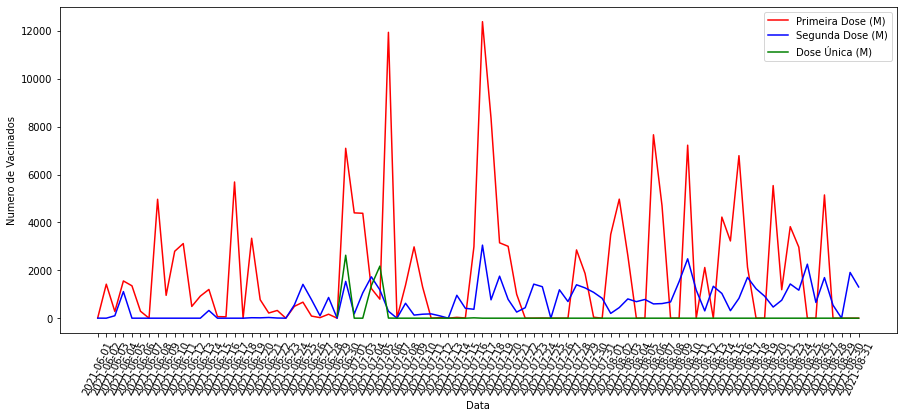

In [9]:
plt.plot(municipal_vacina1Dose.keys(), municipal_vacina1Dose.values, color='r', label='Primeira Dose (M)')
plt.plot(municipal_vacina2Dose.keys(), municipal_vacina2Dose.values, color='b', label='Segunda Dose (M)')
plt.plot(municipal_vacinaDoseUnica.keys(), municipal_vacinaDoseUnica.values, color='g', label='Dose Única (M)')
plt.xticks(rotation='65')
plt.ylabel('Numero de Vacinados')
plt.xlabel('Data')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

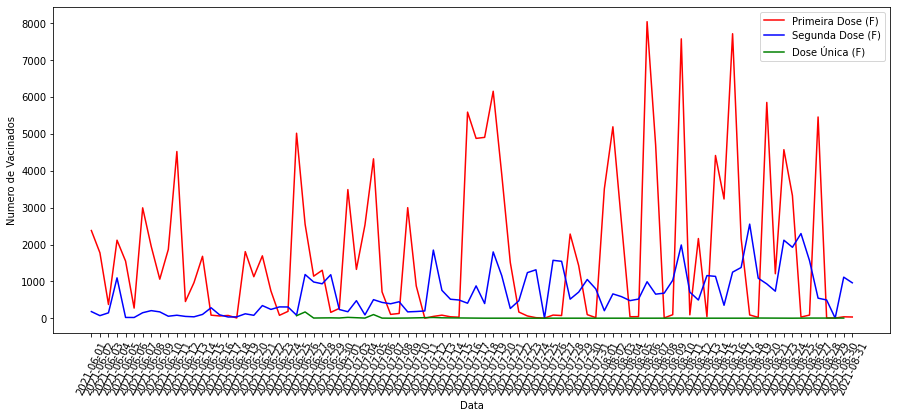

In [10]:
plt.plot(federais_vacina1Dose.keys(), federais_vacina1Dose.values, linestyle='-', color='r', label='Primeira Dose (F)')
plt.plot(federais_vacina2Dose.keys(), federais_vacina2Dose.values, linestyle='-', color='b', label='Segunda Dose (F)')
plt.plot(federais_vacinaDoseUnica.keys(), federais_vacinaDoseUnica.values, linestyle='-', color='g', label='Dose Única (F)')
plt.xticks(rotation='65')
plt.ylabel('Numero de Vacinados')
plt.xlabel('Data')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

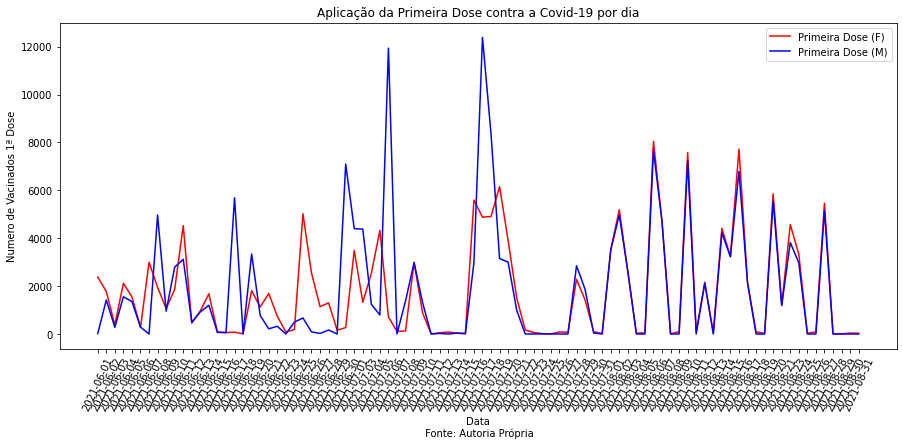

In [11]:
plt.plot(federais_vacina1Dose.keys(), federais_vacina1Dose.values, linestyle='-', color='r', label='Primeira Dose (F)')
plt.plot(municipal_vacina1Dose.keys(), municipal_vacina1Dose.values, linestyle='-', color='b', label='Primeira Dose (M)')
plt.xticks(rotation='65')
plt.ylabel('Numero de Vacinados 1ª Dose')
plt.title('Aplicação da Primeira Dose contra a Covid-19 por dia')
plt.xlabel('Data\n Fonte: Autoria Própria')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

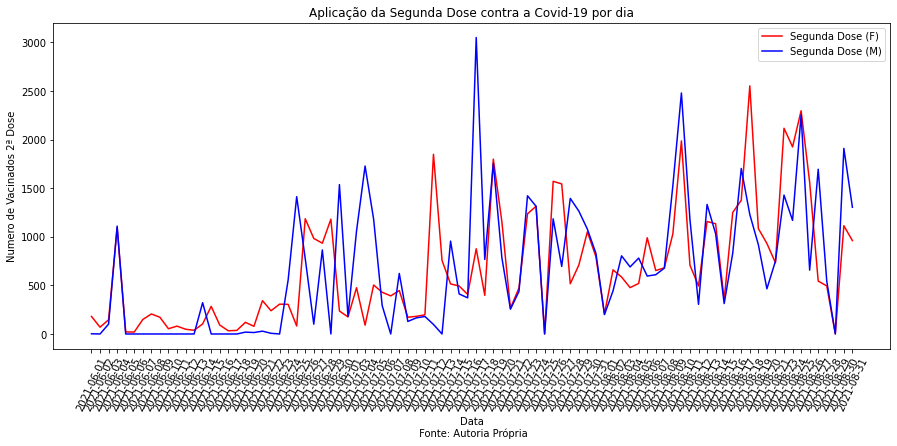

In [12]:
plt.plot(federais_vacina2Dose.keys(), federais_vacina2Dose.values, linestyle='-', color='r', label='Segunda Dose (F)')
plt.plot(municipal_vacina2Dose.keys(), municipal_vacina2Dose.values, linestyle='-', color='b', label='Segunda Dose (M)')
plt.xticks(rotation='65')
plt.ylabel('Numero de Vacinados 2ª Dose')
plt.xlabel('Data\n Fonte: Autoria Própria')
plt.title('Aplicação da Segunda Dose contra a Covid-19 por dia')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

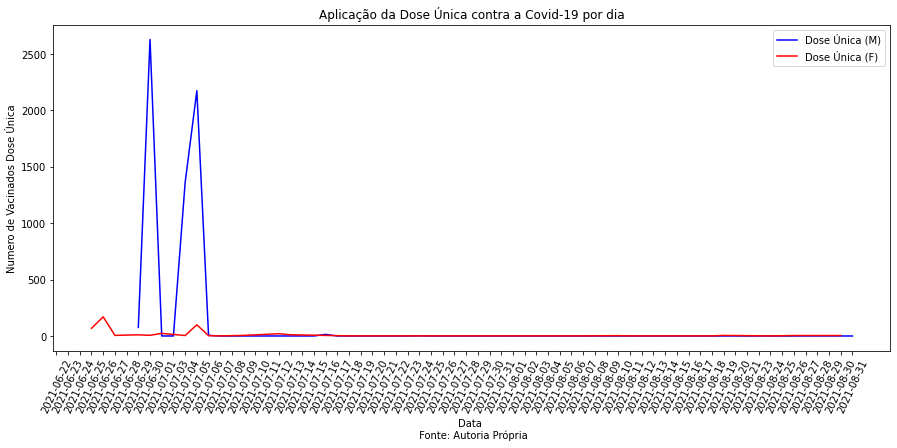

In [13]:
plt.plot(municipal_vacinaDoseUnica.keys(), municipal_vacinaDoseUnica.values, linestyle='-', color='b', label='Dose Única (M)')
plt.plot(federais_vacinaDoseUnica.keys(), federais_vacinaDoseUnica.values, linestyle='-', color='r', label='Dose Única (F)')
plt.xticks(rotation='65')
plt.ylabel('Numero de Vacinados Dose Única')
plt.xlabel('Data \n Fonte: Autoria Própria')
plt.legend()
plt.title('Aplicação da Dose Única contra a Covid-19 por dia')
plt.show